# Looking at YouTube view count growth for top MVs 

## Strategy: 

1. We are going to write two scripts. One is going to get the url and title of the MV. Anotehr is going to write a script to collect the views of the music video from a specific time period. This should also contain the url. 
2. We are going to look at the top 5 trending on Youtube. 

In [1]:
%load_ext autoreload
%autoreload 2

## Importing our libraries 

In [10]:
import requests
import random
import time
from selenium.webdriver import Chrome
# from scrape_functions import (
#     get_comic_title,
#     find_image,
#     scrape_image,
#     get_prev)

In [11]:
browser = Chrome()

In [2]:
url = "https://www.youtube.com/feed/trending"
browser.get(url)

In [3]:
import requests

def get_mv_title(browser):
    """Return the title text"""
    title = browser.find_element_by_id('video-title')
    return title

In [4]:
def get_mv_url(title):
    """Return the url text"""
    return title.get_attribute('href')

In [13]:
from datetime import datetime

def get_view_count(browser, url):
    browser.get(url)
    time.sleep(3)
    """Return the view count"""
    today = datetime.now()
    sel = 'span.view-count'
    view_count = browser.find_element_by_css_selector(sel).text
    return int(view_count.split()[0].replace(",","")), today

In [6]:
url = "https://www.youtube.com/feed/trending"
browser.get(url)
time.sleep(5)
videolinks = browser.find_elements_by_id('video-title')
videos = [(link.text, link.get_attribute('href')) for link in videolinks]

info = []
for title, url in videos[:5]:
    view_count, today = get_view_count(browser, url)
    info.append({'title': title,
                 'url': url })

In [7]:
view_count = []

for item in info:
    count, today = get_view_count(browser, item['url'])
    view_count.append({'url': url,
                       'view_count': count,
                       'date': today})


In [8]:
import pandas as pd

In [9]:
titles_df = pd.DataFrame(info)

In [10]:
titles_df.head()

,title,url
0,Taylor Swift - ME! (feat. Brendon Urie of Pani...,https://www.youtube.com/watch?v=FuXNumBwDOM
1,"Picks 1-10: Multiple QBs, a Top 10 Trade & Mor...",https://www.youtube.com/watch?v=2uSKsTfunzM
2,Fortnite X Avengers: Endgame Trailer,https://www.youtube.com/watch?v=OM_QJkD-Mr8
3,Learning How To BELLY DANCE! (feat. Leilah Isa...,https://www.youtube.com/watch?v=JMn97wtyErM
4,I Tried MATCHA For Better Energy & Focus!,https://www.youtube.com/watch?v=mxt3xkqPrH0


In [11]:
view_count = pd.DataFrame(view_count)

In [12]:
view_count

,date,url,view_count
0,2019-04-26 16:45:57.686681,https://www.youtube.com/watch?v=mxt3xkqPrH0,40553499
1,2019-04-26 16:46:01.788867,https://www.youtube.com/watch?v=mxt3xkqPrH0,686788
2,2019-04-26 16:46:06.104881,https://www.youtube.com/watch?v=mxt3xkqPrH0,6401817
3,2019-04-26 16:46:10.316096,https://www.youtube.com/watch?v=mxt3xkqPrH0,10341
4,2019-04-26 16:46:14.645977,https://www.youtube.com/watch?v=mxt3xkqPrH0,11191


## Saving the file 

In [13]:
from pymongo import MongoClient 
from odo import odo

# open connection
connection = MongoClient()

# get db
db = connection['music_scraping']
coll = db['videos']

for video in info:
    coll.insert_one(video)


/Users/teo/anaconda3/lib/python3.7/site-packages/odo/backends/pandas.py:102: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


In [14]:
coll[0]

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'music_scraping'), 'videos.0')

In [15]:
coll.count_documents({})

5

In [19]:
from pymongo import MongoClient 
connection = MongoClient()
db = connection['music_scraping']
coll = db['videos']
cur = coll.find({})

In [20]:
coll = db['view_count']
for video in cur:
    print(video['title'])
    count, today = get_view_count(browser, video['url'])
    coll.insert_one({
        'title': video['title'],
        'view_count': count,
        'timestamp': today
    })

Taylor Swift - ME! (feat. Brendon Urie of Panic! At The Disco)
Picks 1-10: Multiple QBs, a Top 10 Trade & More! | 2019 NFL Draft
Fortnite X Avengers: Endgame Trailer
Learning How To BELLY DANCE! (feat. Leilah Isaac) - BELLY DANCE BASICS!
I Tried MATCHA For Better Energy & Focus!


In [40]:
coll = db['view_count']
query = {'title': 'Taylor Swift - ME! (feat. Brendon Urie of Panic! At The Disco)'}
cur = coll.find(query)

times = []
counts = []

for i, item in enumerate(cur):
    times.append(str(i))
    
    counts.append(item['view_count'])


<BarContainer object of 3 artists>

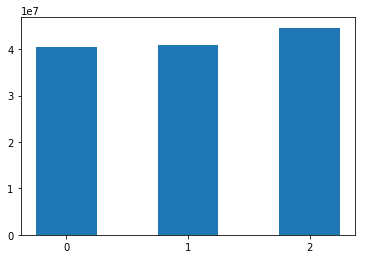

In [42]:
import matplotlib.pyplot as plt

plt.bar(times, counts, width=.5)